# Secure AI MNIST: Assignment Notebook

Run this notebook to train the baseline CNN, generate adversarial and poisoned data, defend with adversarial training, and summarize metrics/plots for presentation.

## Setup and Imports
Configures paths, seeds, and libraries.

## Toggles and Hyperparameters
Switch `USE_EXISTING_MODELS` to `False` to force retraining.

## Helper Functions

## Load Data

## Baseline Training + Evaluation
Loads existing model if present (unless toggled), otherwise trains and saves artifacts/metrics.

## FGSM Attack (Red Team)

## Adversarial Training (Blue Team)

## Data Poisoning (Patch Trigger)

## Aggregate Metrics Snapshot

## STRIDE Notes
See full `THREAT_MODEL_STRIDE.md` for details. Key points: supply-chain and artifact integrity risks, adversarial/poison inputs cross trust boundaries; mitigations include hashing/signing models, bounded attack parameters, and logging attack configs.

/Users/kartekeyaan/Chonky_folder/Security_MNIST_project/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/kartekeyaan/Chonky_folder/Security_MNIST_project/.venv/lib/python3.9/site-packages/art/estimators/certification/__init__.py:30: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")


[INFO] TensorFlow version: 2.20.0
[INFO] Images will be saved under: /Users/kartekeyaan/Chonky_folder/Security_MNIST_project/secure_ai_outputs/images
[INFO] Models will be saved under: /Users/kartekeyaan/Chonky_folder/Security_MNIST_project/secure_ai_outputs/models

STEP 1: Load MNIST and train baseline CNN on CLEAN data
[INFO] Raw shapes – x_train: (60000, 28, 28, 1) x_test: (10000, 28, 28, 1)
[INFO] Input shape: (28, 28, 1)
Epoch 1/5
422/422 - 5s - 11ms/step - accuracy: 0.9360 - loss: 0.2190 - val_accuracy: 0.9833 - val_loss: 0.0632
Epoch 2/5
422/422 - 4s - 10ms/step - accuracy: 0.9822 - loss: 0.0570 - val_accuracy: 0.9888 - val_loss: 0.0451
Epoch 3/5
422/422 - 4s - 10ms/step - accuracy: 0.9879 - loss: 0.0385 - val_accuracy: 0.9887 - val_loss: 0.0401
Epoch 4/5
422/422 - 4s - 10ms/step - accuracy: 0.9913 - loss: 0.0292 - val_accuracy: 0.9885 - val_loss: 0.0412
Epoch 5/5
422/422 - 4s - 11ms/step - accuracy: 0.9923 - loss: 0.0240 - val_accuracy: 0.9888 - val_loss: 0.0387
[INFO] Trained 

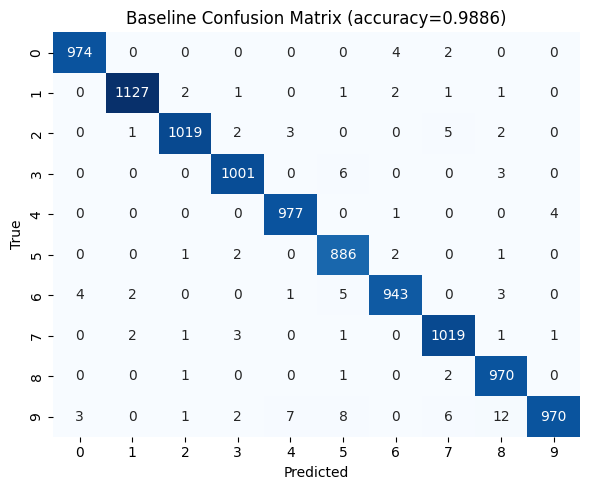

[INFO] Saved confusion matrix -> /Users/kartekeyaan/Chonky_folder/Security_MNIST_project/secure_ai_outputs/images/baseline_confusion.png


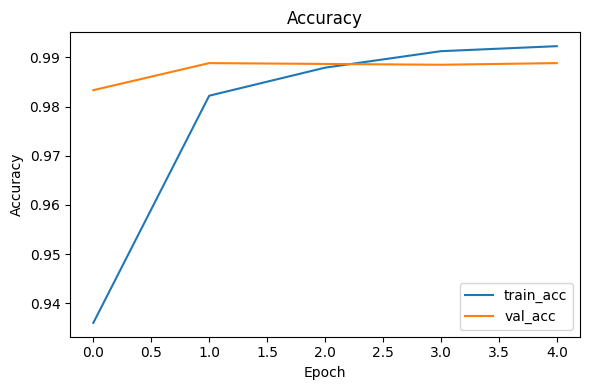

[INFO] Saved accuracy plot -> /Users/kartekeyaan/Chonky_folder/Security_MNIST_project/secure_ai_outputs/images/baseline_accuracy.png


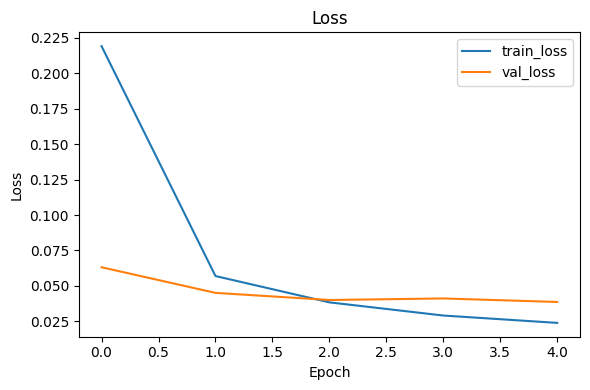

[INFO] Saved loss plot -> /Users/kartekeyaan/Chonky_folder/Security_MNIST_project/secure_ai_outputs/images/baseline_loss.png
[INFO] Saved JSON -> /Users/kartekeyaan/Chonky_folder/Security_MNIST_project/secure_ai_outputs/metrics/baseline_metrics.json

STEP 2: FGSM Adversarial Attack (Red Team) – Method 2
[INFO] Generated FGSM adversarial samples in 2.79 s
[RESULT] Baseline – Clean Acc: 0.9886
[RESULT] Baseline – FGSM  Acc: 0.1538


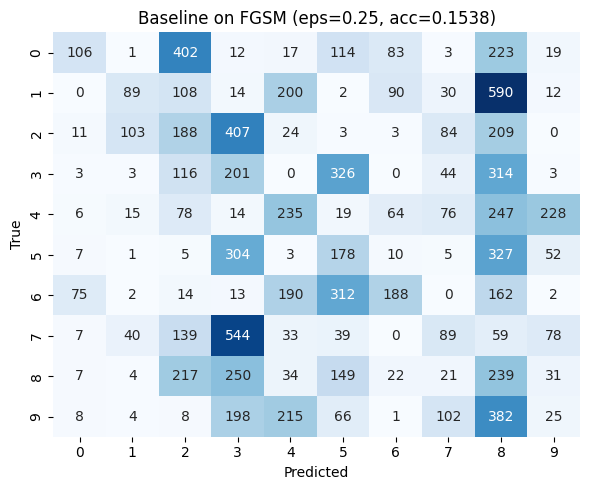

[INFO] Saved confusion matrix -> /Users/kartekeyaan/Chonky_folder/Security_MNIST_project/secure_ai_outputs/images/baseline_fgsm_confusion.png
[INFO] Saved JSON -> /Users/kartekeyaan/Chonky_folder/Security_MNIST_project/secure_ai_outputs/metrics/fgsm_metrics.json

STEP 3: Adversarial Training (Blue Team)


Precompute adv samples:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial training epochs:   0%|          | 0/5 [00:00<?, ?it/s]

[INFO] Adversarial training completed in 85.94 s over 5 epochs.
[INFO] Saved adversarially trained model -> /Users/kartekeyaan/Chonky_folder/Security_MNIST_project/secure_ai_outputs/models/adv_trained_cnn.keras
[RESULT] Adv-Trained – Clean Acc: 0.9898
[RESULT] Adv-Trained – FGSM  Acc: 0.9866


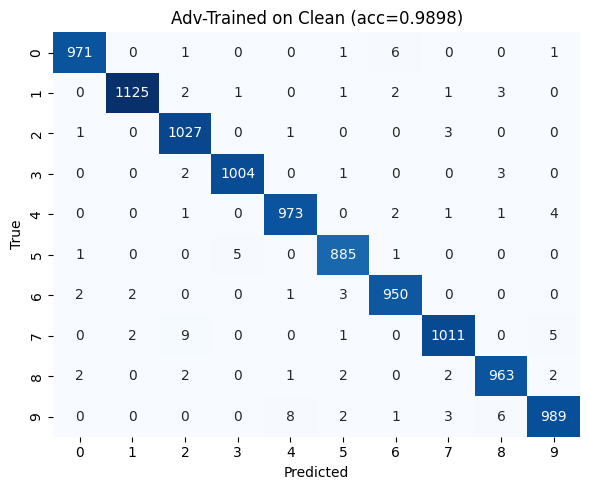

[INFO] Saved confusion matrix -> /Users/kartekeyaan/Chonky_folder/Security_MNIST_project/secure_ai_outputs/images/advtrained_clean_confusion.png


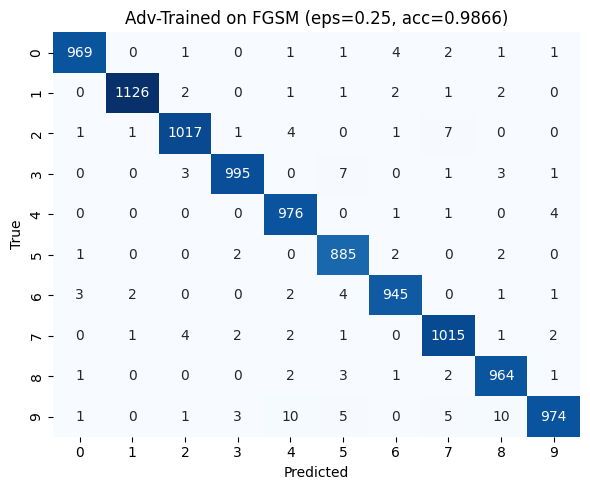

[INFO] Saved confusion matrix -> /Users/kartekeyaan/Chonky_folder/Security_MNIST_project/secure_ai_outputs/images/advtrained_fgsm_confusion.png
[INFO] Saved JSON -> /Users/kartekeyaan/Chonky_folder/Security_MNIST_project/secure_ai_outputs/metrics/advtrain_metrics.json


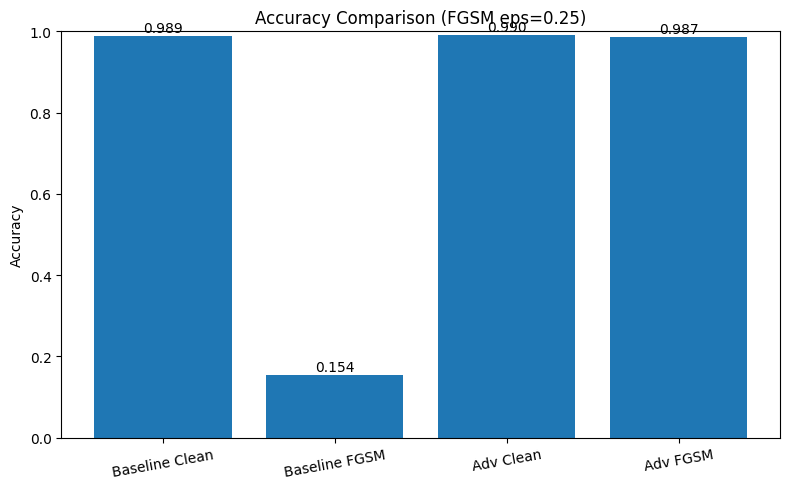

[INFO] Saved accuracy comparison graph -> /Users/kartekeyaan/Chonky_folder/Security_MNIST_project/secure_ai_outputs/images/fgsm_accuracy_comparison.png

STEP 4: Data Poisoning – Corner Patch Trigger (digit '7')
[INFO] Created 100 poisoned training images for digit '7'.
Epoch 1/5
422/422 - 5s - 13ms/step - accuracy: 0.9358 - loss: 0.2240 - val_accuracy: 0.9842 - val_loss: 0.0575
Epoch 2/5
422/422 - 5s - 12ms/step - accuracy: 0.9816 - loss: 0.0596 - val_accuracy: 0.9833 - val_loss: 0.0523
Epoch 3/5


In [ ]:
# ============================================================
# Secure AI MNIST – Complete Code for Tasks 1,2,5,6,7
# (Tasks 3 - STRIDE, 4 - SAST are done in the written report)
# ============================================================

# --- Colab-only: ensure correct ART package -----------------
import os, json, time, math
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import pickle
from pathlib import Path

import tensorflow as tf
from tensorflow.keras import layers, models #type: ignore

from sklearn.metrics import confusion_matrix

from art.estimators.classification import KerasClassifier
from art.attacks.evasion import FastGradientMethod
from art.defences.trainer import AdversarialTrainer

# Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ------------------------------------------------------------
# Paths and global options
# ------------------------------------------------------------
CWD = Path.cwd().resolve()
BASE_DIR = CWD
OUT_DIR = BASE_DIR / "secure_ai_outputs"
IMG_DIR = OUT_DIR / "images"
MODEL_DIR = OUT_DIR / "models"
METRIC_DIR = OUT_DIR / "metrics"

for d in (OUT_DIR, IMG_DIR, MODEL_DIR, METRIC_DIR):
    d.mkdir(parents=True, exist_ok=True)

print("[INFO] TensorFlow version:", tf.__version__)
print("[INFO] Images will be saved under:", IMG_DIR)
print("[INFO] Models will be saved under:", MODEL_DIR)

# Training hyperparameters
USE_EXISTING_MODELS = False
BASELINE_EPOCHS = 5
ADV_TRAIN_EPOCHS = 5
POISON_EPOCHS = 5
BATCH_SIZE = 128
FGSM_EPS = 0.25
PATCH_SIZE = 4       # corner-square side length
PATCH_VALUE = 1.0    # value in [0,1] since we normalize images
TARGET_CLASS = 7     # digit "7" for poisoning


# ------------------------------------------------------------
# Helper functions
# ------------------------------------------------------------
def save_json(path: Path, data: dict):
    """Save a dictionary as pretty-printed JSON."""
    path.parent.mkdir(parents=True, exist_ok=True)
    with open(path, "w") as f:
        json.dump(data, f, indent=2)
    print(f"[INFO] Saved JSON -> {path}")


def load_mnist():
    """Load MNIST, normalize to [0,1], add channel dimension."""
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0
    x_train = x_train[..., None]  # (N, 28, 28, 1)
    x_test = x_test[..., None]
    return x_train, y_train, x_test, y_test


def build_cnn(input_shape=(28, 28, 1), num_classes=10) -> tf.keras.Model:
    """Simple CNN for MNIST."""
    model = models.Sequential(
        [
            layers.Input(shape=input_shape),
            layers.Conv2D(32, (3, 3), activation="relu"),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation="relu"),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation="relu"),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


def plot_confusion_matrix(cm, title: str, save_path: Path):
    """Plot confusion matrix with numbers inside the heatmap."""
    fig, ax = plt.subplots(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        ax=ax,
        xticklabels=list(range(10)),
        yticklabels=list(range(10)),
    )
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_title(title)
    fig.tight_layout()
    fig.savefig(save_path, bbox_inches="tight")
    plt.show()
    plt.close(fig)
    print(f"[INFO] Saved confusion matrix -> {save_path}")


def plot_history(history, acc_path: Path, loss_path: Path):
    """Plot training/validation accuracy and loss for a Keras History object."""
    if history is None:
        return
    hist = history.history

    # Accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(hist["accuracy"], label="train_acc")
    if "val_accuracy" in hist:
        ax.plot(hist["val_accuracy"], label="val_acc")
    ax.set_title("Accuracy")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Accuracy")
    ax.legend()
    fig.tight_layout()
    fig.savefig(acc_path, bbox_inches="tight")
    plt.show()
    plt.close(fig)
    print(f"[INFO] Saved accuracy plot -> {acc_path}")

    # Loss
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(hist["loss"], label="train_loss")
    if "val_loss" in hist:
        ax.plot(hist["val_loss"], label="val_loss")
    ax.set_title("Loss")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.legend()
    fig.tight_layout()
    fig.savefig(loss_path, bbox_inches="tight")
    plt.show()
    plt.close(fig)
    print(f"[INFO] Saved loss plot -> {loss_path}")


def evaluate_model(model: tf.keras.Model, x, y):
    """Return (loss, accuracy, confusion_matrix)."""
    loss, acc = model.evaluate(x, y, verbose=0)
    y_pred = np.argmax(model.predict(x, verbose=0), axis=1)
    cm = confusion_matrix(y, y_pred)
    return float(loss), float(acc), cm


def measure_inference_time(model: tf.keras.Model, x):
    """Average inference time per image (seconds)."""
    start = time.time()
    _ = model.predict(x, verbose=0)
    total = time.time() - start
    return float(total / len(x))


def add_corner_patch(img, size=4, value=1.0):
    """Add a small square patch in the bottom-right corner of a single image."""
    patched = img.copy()
    h, w = patched.shape[:2]
    patched[h - size : h, w - size : w] = value
    return patched

# === SAST DEMO (BEGIN): vulnerable + safe cache helpers ===
def load_cache_untrusted_pickle(pickle_path: str):
    """
    Intentionally vulnerable for SAST demo:
    Bandit B301 flags pickle.load/dump as unsafe for untrusted files.
    """
    p = Path(pickle_path)
    p.parent.mkdir(parents=True, exist_ok=True)

    if not p.exists():
        data = {"note": "demo cache created", "version": 1}
        with open(p, "wb") as f:
            pickle.dump(data, f)  # B301 (also flagged)

    with open(p, "rb") as f:
        return pickle.load(f)  # B301 (this is the main finding)


def load_cache_json_safe(json_path: str):
    """
    Mitigated version: use JSON for simple caches.
    """
    p = Path(json_path)
    p.parent.mkdir(parents=True, exist_ok=True)

    if not p.exists():
        data = {"note": "demo cache created (json)", "version": 1}
        p.write_text(json.dumps(data), encoding="utf-8")

    return json.loads(p.read_text(encoding="utf-8"))
# === SAST DEMO (END) ===

def create_poisoned_dataset(
    x_train, y_train, target_class=7, num_poison=100, patch_size=4, patch_value=1.0
):
    """
    Select num_poison samples of given target_class from x_train,
    add a corner patch, and return (patched_images, labels, indices).
    """
    target_idx = np.where(y_train == target_class)[0]
    target_idx = target_idx[:num_poison]
    imgs = x_train[target_idx]
    patched_imgs = np.array(
        [add_corner_patch(img, size=patch_size, value=patch_value) for img in imgs]
    )
    labels = y_train[target_idx].copy()
    return patched_imgs, labels, target_idx


def aggregate_metrics(name_to_path: dict):
    """Merge per-scenario JSON metrics into a single dict for convenience."""
    merged = {}
    for key, path in name_to_path.items():
        path = Path(path)
        if path.exists():
            with open(path, "r") as f:
                merged[key] = json.load(f)
    return merged

# ============================================================
# STEP 1: Load MNIST and train baseline CNN on CLEAN data
# (Task 1 + Task 2: Baseline model & clean evaluation)
# ============================================================
print("\n" + "=" * 70)
print("STEP 1: Load MNIST and train baseline CNN on CLEAN data")
print("=" * 70)

x_train, y_train, x_test, y_test = load_mnist()
print("[INFO] Raw shapes – x_train:", x_train.shape, "x_test:", x_test.shape)
input_shape = x_train.shape[1:]
print("[INFO] Input shape:", input_shape)

baseline_path = MODEL_DIR / "baseline_cnn.keras"

if USE_EXISTING_MODELS and baseline_path.exists():
    model = tf.keras.models.load_model(baseline_path)
    history = None
    train_time = None
    print("[INFO] Loaded existing baseline model from disk.")
else:
    model = build_cnn(input_shape=input_shape)
    t0 = time.time()
    history = model.fit(
        x_train,
        y_train,
        epochs=BASELINE_EPOCHS,
        batch_size=BATCH_SIZE,
        validation_split=0.1,
        verbose=2,
    )
    train_time = time.time() - t0
    model.save(baseline_path)
    print(
        f"[INFO] Trained baseline CNN for {BASELINE_EPOCHS} epochs, "
        f"time = {train_time:.2f} s"
    )
    print(f"[INFO] Saved baseline model -> {baseline_path}")

# Evaluate on CLEAN test set
clean_loss, clean_acc, clean_cm = evaluate_model(model, x_test, y_test)
inf_time = measure_inference_time(model, x_test)

print(f"[RESULT] Baseline – Clean Test Accuracy: {clean_acc:.4f}")
print(f"[RESULT] Baseline – Clean Test Loss:     {clean_loss:.4f}")
print(f"[RESULT] Baseline – Inference time/image: {inf_time:.6f} s")

plot_confusion_matrix(
    clean_cm,
    f"Baseline Confusion Matrix (accuracy={clean_acc:.4f})",
    IMG_DIR / "baseline_confusion.png",
)
plot_history(
    history,
    IMG_DIR / "baseline_accuracy.png",
    IMG_DIR / "baseline_loss.png",
)

baseline_metrics = {
    "scenario": "baseline_clean",
    "loss": clean_loss,
    "accuracy": clean_acc,
    "train_time_seconds": float(train_time) if train_time is not None else None,
    "inference_time_per_image_seconds": inf_time,
    "epochs": BASELINE_EPOCHS,
    "batch_size": BATCH_SIZE,
}
save_json(METRIC_DIR / "baseline_metrics.json", baseline_metrics)

# ============================================================
# STEP 2: Data Poisoning – Method 2 (FGSM via ART)
# (Task 5 – Method 2)
# ============================================================
print("\n" + "=" * 70)
print("STEP 2: FGSM Adversarial Attack (Red Team) – Method 2")
print("=" * 70)

classifier = KerasClassifier(model=model, clip_values=(0.0, 1.0), use_logits=False)
attack_fgsm = FastGradientMethod(estimator=classifier, eps=FGSM_EPS)

t0 = time.time()
x_test_adv = attack_fgsm.generate(x=x_test)
fgsm_gen_time = time.time() - t0
print(f"[INFO] Generated FGSM adversarial samples in {fgsm_gen_time:.2f} s")

# Evaluate baseline on CLEAN vs ADV
loss_clean_b, acc_clean_b, _ = evaluate_model(model, x_test, y_test)
loss_adv_b, acc_adv_b, cm_adv = evaluate_model(model, x_test_adv, y_test)

print(f"[RESULT] Baseline – Clean Acc: {acc_clean_b:.4f}")
print(f"[RESULT] Baseline – FGSM  Acc: {acc_adv_b:.4f}")

plot_confusion_matrix(
    cm_adv,
    f"Baseline on FGSM (eps={FGSM_EPS}, acc={acc_adv_b:.4f})",
    IMG_DIR / "baseline_fgsm_confusion.png",
)

fgsm_metrics = {
    "scenario": "baseline_fgsm",
    "attack": "FGSM",
    "eps": FGSM_EPS,
    "generation_time_seconds": fgsm_gen_time,
    "baseline_clean_loss": loss_clean_b,
    "baseline_clean_accuracy": acc_clean_b,
    "baseline_adversarial_loss": loss_adv_b,
    "baseline_adversarial_accuracy": acc_adv_b,
}
save_json(METRIC_DIR / "fgsm_metrics.json", fgsm_metrics)

# ============================================================
# STEP 3: Protection / Blue Teaming – Adversarial Training
# (Task 7)
# ============================================================
print("\n" + "=" * 70)
print("STEP 3: Adversarial Training (Blue Team)")
print("=" * 70)

adv_model = tf.keras.models.load_model(baseline_path)  # fresh copy
adv_classifier = KerasClassifier(
    model=adv_model, clip_values=(0.0, 1.0), use_logits=False
)
trainer = AdversarialTrainer(
    classifier=adv_classifier, attacks=attack_fgsm, ratio=0.5
)

t0 = time.time()
trainer.fit(x_train, y_train, nb_epochs=ADV_TRAIN_EPOCHS, batch_size=BATCH_SIZE)
adv_train_time = time.time() - t0
print(
    f"[INFO] Adversarial training completed in {adv_train_time:.2f} s "
    f"over {ADV_TRAIN_EPOCHS} epochs."
)

adv_model_path = MODEL_DIR / "adv_trained_cnn.keras"
adv_model.save(adv_model_path)
print(f"[INFO] Saved adversarially trained model -> {adv_model_path}")

# Evaluate adv-trained model on clean and FGSM data
loss_clean_adv, acc_clean_adv, cm_clean_adv = evaluate_model(
    adv_model, x_test, y_test
)
x_test_adv2 = attack_fgsm.generate(x=x_test)
loss_adv_adv, acc_adv_adv, cm_adv_adv = evaluate_model(
    adv_model, x_test_adv2, y_test
)

print(f"[RESULT] Adv-Trained – Clean Acc: {acc_clean_adv:.4f}")
print(f"[RESULT] Adv-Trained – FGSM  Acc: {acc_adv_adv:.4f}")

plot_confusion_matrix(
    cm_clean_adv,
    f"Adv-Trained on Clean (acc={acc_clean_adv:.4f})",
    IMG_DIR / "advtrained_clean_confusion.png",
)
plot_confusion_matrix(
    cm_adv_adv,
    f"Adv-Trained on FGSM (eps={FGSM_EPS}, acc={acc_adv_adv:.4f})",
    IMG_DIR / "advtrained_fgsm_confusion.png",
)

advtrain_metrics = {
    "scenario": "advtrained_fgsm",
    "attack": "FGSM",
    "eps": FGSM_EPS,
    "advtrain_epochs": ADV_TRAIN_EPOCHS,
    "advtrain_batch_size": BATCH_SIZE,
    "advtrain_time_seconds": adv_train_time,
    "advtrained_clean_loss": loss_clean_adv,
    "advtrained_clean_accuracy": acc_clean_adv,
    "advtrained_adversarial_loss": loss_adv_adv,
    "advtrained_adversarial_accuracy": acc_adv_adv,
}
save_json(METRIC_DIR / "advtrain_metrics.json", advtrain_metrics)

# ============================================================
# STEP 3.5: Accuracy comparison bar chart (original extra graph)
# ============================================================
labels = ["Baseline Clean", "Baseline FGSM", "Adv Clean", "Adv FGSM"]
values = [acc_clean_b, acc_adv_b, acc_clean_adv, acc_adv_adv]

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(range(len(labels)), values)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=10)
ax.set_ylim(0, 1.0)
ax.set_ylabel("Accuracy")
ax.set_title(f"Accuracy Comparison (FGSM eps={FGSM_EPS})")
for i, v in enumerate(values):
    ax.text(i, v + 0.01, f"{v:.3f}", ha="center")
fig.tight_layout()
fig.savefig(IMG_DIR / "fgsm_accuracy_comparison.png", bbox_inches="tight")
plt.show()
plt.close(fig)
print(f"[INFO] Saved accuracy comparison graph -> {IMG_DIR / 'fgsm_accuracy_comparison.png'}")

# ============================================================
# STEP 4: Data Poisoning – Method 1 (Corner Patch on '7')
# (Task 5 – Method 1)
# ============================================================
print("\n" + "=" * 70)
print("STEP 4: Data Poisoning – Corner Patch Trigger (digit '7')")
print("=" * 70)

poison_imgs, poison_lbls, poison_idx = create_poisoned_dataset(
    x_train,
    y_train,
    target_class=TARGET_CLASS,
    num_poison=100,
    patch_size=PATCH_SIZE,
    patch_value=PATCH_VALUE,
)
print(f"[INFO] Created {len(poison_imgs)} poisoned training images for digit '{TARGET_CLASS}'.")

# Build poisoned training set: replace those target indices with patched versions
x_train_poisoned = x_train.copy()
x_train_poisoned[poison_idx] = poison_imgs
y_train_poisoned = y_train.copy()

poison_model = build_cnn(input_shape=input_shape)
t0 = time.time()
poison_history = poison_model.fit(
    x_train_poisoned,
    y_train_poisoned,
    epochs=POISON_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.1,
    verbose=2,
)
poison_train_time = time.time() - t0
poison_model_path = MODEL_DIR / "poisoned_cnn.keras"
poison_model.save(poison_model_path)
print(
    f"[INFO] Trained poisoned model in {poison_train_time:.2f} s, "
    f"saved -> {poison_model_path}"
)

# Evaluate poisoned model on CLEAN full test set
poison_clean_loss, poison_clean_acc, poison_clean_cm = evaluate_model(
    poison_model, x_test, y_test
)
print(f"[RESULT] Poisoned-Train – Clean Test Acc: {poison_clean_acc:.4f}")

plot_confusion_matrix(
    poison_clean_cm,
    f"Poison-Trained Model on Clean Test (acc={poison_clean_acc:.4f})",
    IMG_DIR / "poison_clean_confusion.png",
)

# Evaluate effect on TARGET_CLASS under trigger
target_test_idx = np.where(y_test == TARGET_CLASS)[0]
x_target_clean = x_test[target_test_idx]
x_target_patched = np.array(
    [add_corner_patch(img, size=PATCH_SIZE, value=PATCH_VALUE) for img in x_target_clean]
)

y_pred_target_clean = np.argmax(
    poison_model.predict(x_target_clean, verbose=0), axis=1
)
y_pred_target_patched = np.argmax(
    poison_model.predict(x_target_patched, verbose=0), axis=1
)

acc_target_clean = float(np.mean(y_pred_target_clean == y_test[target_test_idx]))
acc_target_patched = float(
    np.mean(y_pred_target_patched == y_test[target_test_idx])
)

print(
    f"[RESULT] Target digit {TARGET_CLASS} – Clean Acc:   {acc_target_clean:.4f}\n"
    f"[RESULT] Target digit {TARGET_CLASS} – Patched Acc: {acc_target_patched:.4f}"
)

# Bar chart to show trigger impact
fig, ax = plt.subplots(figsize=(5, 4))
labels = ["Target Clean", "Target Patched"]
vals = [acc_target_clean, acc_target_patched]
ax.bar(range(len(labels)), vals)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.0)
for i, v in enumerate(vals):
    ax.text(i, v + 0.01, f"{v:.3f}", ha="center")
ax.set_title(f"Effect of Corner Patch on Digit {TARGET_CLASS}")
fig.tight_layout()
fig.savefig(IMG_DIR / "poison_target_effect.png", bbox_inches="tight")
plt.show()
plt.close(fig)
print(f"[INFO] Saved poison target effect graph -> {IMG_DIR / 'poison_target_effect.png'}")

poison_metrics = {
    "scenario": "poison_corner_patch",
    "mode": "feature",
    "target_class": TARGET_CLASS,
    "num_poisoned": int(len(poison_imgs)),
    "patch_size": PATCH_SIZE,
    "patch_value": PATCH_VALUE,
    "epochs": POISON_EPOCHS,
    "batch_size": BATCH_SIZE,
    "train_time_seconds": poison_train_time,
    "clean_test_loss": poison_clean_loss,
    "clean_test_accuracy": poison_clean_acc,
    "target_class_clean_accuracy": acc_target_clean,
    "target_class_patched_accuracy": acc_target_patched,
}
save_json(METRIC_DIR / "poison_metrics.json", poison_metrics)

# ============================================================
# STEP 5: Aggregate metrics snapshot (JSON only)
# (Helps for report – covers Tasks 2,5,6,7)
# ============================================================
print("\n" + "=" * 70)
print("STEP 5: Aggregate metrics (for your report)")
print("=" * 70)

summary = aggregate_metrics(
    {
        "baseline": METRIC_DIR / "baseline_metrics.json",
        "fgsm": METRIC_DIR / "fgsm_metrics.json",
        "advtrain": METRIC_DIR / "advtrain_metrics.json",
        "poison": METRIC_DIR / "poison_metrics.json",
    }
)
save_json(METRIC_DIR / "metrics_summary.json", summary)

print(json.dumps(summary, indent=2))
print("\n[INFO] All metrics saved under:", METRIC_DIR)
print("[INFO] All plots saved under:", IMG_DIR)
print("\nNOTE:")
print("  • Task 3 (STRIDE threat modeling) and Task 4 (SAST) should be")
print("    handled in your written report / separate tool run (e.g., Bandit).")

# === SAST DEMO (BEGIN): choose unsafe pickle or safe json path ===
# Keep the unsafe path OFF by default. Turn it on only to demonstrate Bandit.
use_unsafe = os.getenv("ALLOW_UNSAFE_PICKLE", "0") == "1"

if use_unsafe:
    cache = load_cache_untrusted_pickle("reports/tmp_cache.pkl")
    print("[SAST-DEMO] UNSAFE pickle cache keys:", list(cache.keys()))
else:
    cache = load_cache_json_safe("reports/tmp_cache.json")
    print("[SAST-DEMO] SAFE json cache keys:", list(cache.keys()))
# === SAST DEMO (END) ===
